# Generate Kaplan Meier Curves 

### Install Necessary Plotting Library
To plot kaplan meier curves the _lifelines_ library is required 

In [12]:
!pip install lifelines

In [2]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

In [13]:
from Analysis import Analysis
from Database import Database

## Find prostate cancer patients
Use the Database Class to find mrns for prostate cancer patients

In [14]:
d = Database()

Connect To Database


username: ········
encryption key: ········


Connected: {'user': 'admin', 'channel_binding': 'prefer', 'dbname': 'clinical', 'host': 'clinical_db', 'port': '5432', 'options': '-c search_path=clinical_document,rad_onc,public', 'sslmode': 'require', 'sslcompression': '0', 'sslsni': '1', 'ssl_min_protocol_version': 'TLSv1.2', 'gssencmode': 'prefer', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'}


In [15]:
patient_filter=[{'tag': 'diagnosis', 'attribute': 'value', 'value': ['C61;Malignant_neoplasm_of_prostate']}]
print(f"{patient_filter=}")
mrns = d.get_mrns_where_tag_value(patient_filter)
print(f"mrns:{mrns}")

# Close Database Class
del d

patient_filter=[{'tag': 'diagnosis', 'attribute': 'value', 'value': ['C61;Malignant_neoplasm_of_prostate']}]
mrns:['111111' '222222' '333333' '666666']


### Create an instance of the Analysis class

In [16]:
a = Analysis()

Connect To Database


username: ········
encryption key: ········


Connected: {'user': 'admin', 'channel_binding': 'prefer', 'dbname': 'clinical', 'host': 'clinical_db', 'port': '5432', 'options': '-c search_path=clinical_document,rad_onc,public', 'sslmode': 'require', 'sslcompression': '0', 'sslsni': '1', 'ssl_min_protocol_version': 'TLSv1.2', 'gssencmode': 'prefer', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'}


## Define start and event
What tag defines the start time (eg. surgery, radiation)
What tag defines an event (eg. death, biochemical_progression)

In [17]:
start_tag = 'c61.surgery'
event_tag = 'c61.biochemical_progression'

### Use the method _kaplan_meier_ to get kaplan meier data

In [18]:
output = a.kaplan_meier(mrns, start_tag, event_tag)
output

{'mrns': ['111111', '333333', '666666'],
 'durations': [113, 66, 1431],
 'events': [1, 1, 1]}

### Plot The Kaplan Meier Curve

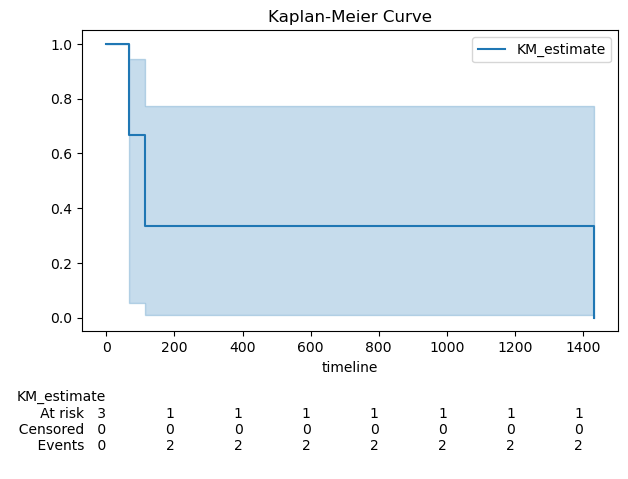

In [19]:
# Extract Data
mrns = output['mrns']
durations = output['durations']
events = output['events']

# Generate Kaplan Meier
kmf = KaplanMeierFitter()
kmf.fit(durations, event_observed=events)
kmf.plot_survival_function(at_risk_counts=True)
plt.title('Kaplan-Meier Curve')
plt.show()
plt.close()

In [ ]:
del a